<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [194]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns
sns.set_context('talk')
import warnings
warnings.filterwarnings('ignore')
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer


In [195]:
df_2=pd.read_csv(r'C:\Users\Usuario\Desktop\Roco\Analisis y curacion de datos\DF_curacion_tp1.csv')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11477 non-null  int64  
 1   Bathroom              11477 non-null  float64
 2   Bedroom2              11477 non-null  float64
 3   BuildingArea          6006 non-null   float64
 4   Car                   11477 non-null  float64
 5   CouncilArea           10433 non-null  object 
 6   Landsize2             9593 non-null   float64
 7   Postcode              11477 non-null  float64
 8   Price                 11477 non-null  float64
 9   Rooms                 11477 non-null  int64  
 10  Suburb                11477 non-null  object 
 11  Type                  11477 non-null  object 
 12  YearBuilt             6945 non-null   float64
 13  airbnb_price_mean_zp  11477 non-null  float64
 14  city                  11457 non-null  object 
 15  conteo_zipcode     

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [196]:
df_2.drop('Unnamed: 0', axis=1, inplace=True)

In [197]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bathroom              11477 non-null  float64
 1   Bedroom2              11477 non-null  float64
 2   BuildingArea          6006 non-null   float64
 3   Car                   11477 non-null  float64
 4   CouncilArea           10433 non-null  object 
 5   Landsize2             9593 non-null   float64
 6   Postcode              11477 non-null  float64
 7   Price                 11477 non-null  float64
 8   Rooms                 11477 non-null  int64  
 9   Suburb                11477 non-null  object 
 10  Type                  11477 non-null  object 
 11  YearBuilt             6945 non-null   float64
 12  airbnb_price_mean_zp  11477 non-null  float64
 13  city                  11457 non-null  object 
 14  conteo_zipcode        11477 non-null  float64
 15  suburb:1           

Seleccionamos las columnas de interés excepto BuildingArea,YearBuilt y Landsize2, las cuales serán imputadas más adelante.

In [198]:
df_3=df_2[df_2.columns.difference(['YearBuilt','BuildingArea','Landsize2'])]

In [199]:
#Podemos observar que en el df están todas las columnas de interés excepto Yearbuilt y Buildingarea
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bathroom              11477 non-null  float64
 1   Bedroom2              11477 non-null  float64
 2   Car                   11477 non-null  float64
 3   CouncilArea           10433 non-null  object 
 4   Postcode              11477 non-null  float64
 5   Price                 11477 non-null  float64
 6   Rooms                 11477 non-null  int64  
 7   Suburb                11477 non-null  object 
 8   Type                  11477 non-null  object 
 9   airbnb_price_mean_zp  11477 non-null  float64
 10  city                  11457 non-null  object 
 11  conteo_zipcode        11477 non-null  float64
 12  suburb:1              11457 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 1.1+ MB


##### Separamos en primera instancia , las columnas categóricas de las numéricas

In [200]:
categorical_columns=[]
numerical_columns=[]
for i in df_3.columns:
    if df_3[i].dtype=='object':
        categorical_columns.append(i)
    elif df_3[i].dtype in ['int64','float64']:
        numerical_columns.append(i)
        
print(categorical_columns)
print(numerical_columns)

['CouncilArea', 'Suburb', 'Type', 'city', 'suburb:1']
['Bathroom', 'Bedroom2', 'Car', 'Postcode', 'Price', 'Rooms', 'airbnb_price_mean_zp', 'conteo_zipcode']


In [201]:
# Check for nulls
df_3[categorical_columns].isna().sum()

CouncilArea    1044
Suburb            0
Type              0
city             20
suburb:1         20
dtype: int64

In [202]:
# Check for nulls
df_3[numerical_columns].isna().sum()

Bathroom                0
Bedroom2                0
Car                     0
Postcode                0
Price                   0
Rooms                   0
airbnb_price_mean_zp    0
conteo_zipcode          0
dtype: int64

In [203]:
categorical_columns

['CouncilArea', 'Suburb', 'Type', 'city', 'suburb:1']

In [204]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
encoder.fit(df_3[categorical_columns])
encoder.categories_
########
encoded_categories=encoder.transform(df_3[categorical_columns])
encoded_categories[:10]
#######
encoded_df_categories = pd.DataFrame(data=encoded_categories, columns=encoder.get_feature_names(categorical_columns))

In [205]:
encoded_df_categories

,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,...,suburb:1_West Melbourne,suburb:1_Westmeadows,suburb:1_Wheelers Hill,suburb:1_Williams Landing,suburb:1_Williamstown,suburb:1_Williamstown North,suburb:1_Windsor,suburb:1_Yarra Glen,suburb:1_Yarraville,suburb:1_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [206]:
df_4=pd.concat([encoded_df_categories, df_3[numerical_columns]], axis=1)
df_4

,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,...,suburb:1_Yarraville,suburb:1_nan,Bathroom,Bedroom2,Car,Postcode,Price,Rooms,airbnb_price_mean_zp,conteo_zipcode
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,1.0,3067.0,1480000.0,2,130.6240,258.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,3067.0,1035000.0,2,130.6240,258.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,3067.0,1465000.0,3,130.6240,258.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,1.0,3067.0,850000.0,3,130.6240,258.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,2.0,3067.0,1600000.0,4,130.6240,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,2.0,3049.0,582000.0,3,92.2857,21.0
11473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.0,2.0,3150.0,1245000.0,4,124.0265,189.0
11474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,2.0,3016.0,1031000.0,3,191.0946,74.0
11475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,4.0,3016.0,1170000.0,3,191.0946,74.0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [207]:
#Prueba
df_5 = pd.concat([df_4, df_2[['YearBuilt', 'BuildingArea','Landsize2']]], axis=1)

In [208]:
df_5.columns

Index(['CouncilArea_Banyule', 'CouncilArea_Bayside', 'CouncilArea_Boroondara',
       'CouncilArea_Brimbank', 'CouncilArea_Cardinia', 'CouncilArea_Casey',
       'CouncilArea_Darebin', 'CouncilArea_Frankston', 'CouncilArea_Glen Eira',
       'CouncilArea_Greater Dandenong',
       ...
       'Bedroom2', 'Car', 'Postcode', 'Price', 'Rooms', 'airbnb_price_mean_zp',
       'conteo_zipcode', 'YearBuilt', 'BuildingArea', 'Landsize2'],
      dtype='object', length=529)

In [209]:
numerical_columns=[]
for i in df_5.columns:
    if df_5[i].dtype=='object':
        categorical_columns.append(i)
    elif df_5[i].dtype in ['int64','float64']:
        numerical_columns.append(i)
        
print(numerical_columns)

['CouncilArea_Banyule', 'CouncilArea_Bayside', 'CouncilArea_Boroondara', 'CouncilArea_Brimbank', 'CouncilArea_Cardinia', 'CouncilArea_Casey', 'CouncilArea_Darebin', 'CouncilArea_Frankston', 'CouncilArea_Glen Eira', 'CouncilArea_Greater Dandenong', 'CouncilArea_Hobsons Bay', 'CouncilArea_Hume', 'CouncilArea_Kingston', 'CouncilArea_Knox', 'CouncilArea_Manningham', 'CouncilArea_Maribyrnong', 'CouncilArea_Maroondah', 'CouncilArea_Melbourne', 'CouncilArea_Melton', 'CouncilArea_Monash', 'CouncilArea_Moonee Valley', 'CouncilArea_Moreland', 'CouncilArea_Nillumbik', 'CouncilArea_Port Phillip', 'CouncilArea_Stonnington', 'CouncilArea_Unavailable', 'CouncilArea_Whitehorse', 'CouncilArea_Whittlesea', 'CouncilArea_Wyndham', 'CouncilArea_Yarra', 'CouncilArea_Yarra Ranges', 'CouncilArea_nan', 'Suburb_Abbotsford', 'Suburb_Aberfeldie', 'Suburb_Airport West', 'Suburb_Albert Park', 'Suburb_Albion', 'Suburb_Alphington', 'Suburb_Altona', 'Suburb_Altona Meadows', 'Suburb_Armadale', 'Suburb_Ascot Vale', 'Sub

In [210]:
df_5

,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,...,Bedroom2,Car,Postcode,Price,Rooms,airbnb_price_mean_zp,conteo_zipcode,YearBuilt,BuildingArea,Landsize2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,3067.0,1480000.0,2,130.6240,258.0,NaN,NaN,202.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,3067.0,1035000.0,2,130.6240,258.0,1900.0,79.0,156.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3067.0,1465000.0,3,130.6240,258.0,1900.0,150.0,134.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,3067.0,850000.0,3,130.6240,258.0,NaN,NaN,94.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,3067.0,1600000.0,4,130.6240,258.0,2014.0,142.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,3049.0,582000.0,3,92.2857,21.0,NaN,NaN,256.0
11473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,3150.0,1245000.0,4,124.0265,189.0,1981.0,NaN,652.0
11474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,3016.0,1031000.0,3,191.0946,74.0,1995.0,133.0,333.0
11475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,3016.0,1170000.0,3,191.0946,74.0,1997.0,NaN,436.0


In [211]:
#####
#####
from sklearn.preprocessing import StandardScaler

df_a_escalar=df_5[['Bathroom', 'Car', 'Postcode', 'Price', 'Rooms', 'airbnb_price_mean_zp', 'conteo_zipcode', 'YearBuilt', 'BuildingArea', 'Landsize2']]

scaler = StandardScaler()
scaler.fit(df_a_escalar.drop(['YearBuilt','BuildingArea','Landsize2'],axis=1))
#####
#####
scaled_features = scaler.transform(df_a_escalar.drop(['YearBuilt','BuildingArea','Landsize2'],axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df_a_escalar.columns[:-3])
df_feat.head()
###########
#########
df_5_scaled = pd.concat([df_feat, df_5[['YearBuilt', 'BuildingArea','Landsize2']]], axis=1)

In [212]:
#Prueba
df_5_scaled.isna().sum()

Bathroom                   0
Car                        0
Postcode                   0
Price                      0
Rooms                      0
airbnb_price_mean_zp       0
conteo_zipcode             0
YearBuilt               4532
BuildingArea            5471
Landsize2               1884
dtype: int64

In [213]:
#Prueba
df5_mice = df_5_scaled.copy(deep=True)
#####
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df5_mice[['YearBuilt','BuildingArea','Landsize2']] = mice_imputer.fit_transform(df5_mice[['YearBuilt', 'BuildingArea','Landsize2']])

In [214]:
#Prueba
df5_mice

,Bathroom,Car,Postcode,Price,Rooms,airbnb_price_mean_zp,conteo_zipcode,YearBuilt,BuildingArea,Landsize2
0,-0.751581,-0.571060,-0.459587,1.029909,-0.893461,0.007528,0.278724,2002.0,112.2,202.0
1,-0.751581,-1.645495,-0.459587,0.069409,-0.893461,0.007528,0.278724,1900.0,79.0,156.0
2,0.840794,-1.645495,-0.459587,0.997533,0.178375,0.007528,0.278724,1900.0,150.0,134.0
3,0.840794,-0.571060,-0.459587,-0.329900,0.178375,0.007528,0.278724,1971.6,73.8,94.0
4,-0.751581,0.503375,-0.459587,1.288920,1.250211,0.007528,0.278724,2014.0,142.0,120.0
...,...,...,...,...,...,...,...,...,...,...
11472,0.840794,0.503375,-0.694304,-0.908359,0.178375,-0.751562,-0.537670,1927.6,90.4,256.0
11473,0.840794,0.503375,0.622718,0.522679,1.250211,-0.123101,0.041040,1981.0,156.2,652.0
11474,0.840794,0.503375,-1.124618,0.060775,0.178375,1.204832,-0.355101,1995.0,133.0,333.0
11475,0.840794,2.652246,-1.124618,0.360796,0.178375,1.204832,-0.355101,1997.0,226.4,436.0


In [215]:
df5_mice[['Landsize2','YearBuilt','BuildingArea']].describe()

,Landsize2,YearBuilt,BuildingArea
count,11477.000000,11477.000000,11477.000000
mean,619.147547,1960.925277,131.892292
std,1447.366304,31.233922,105.699221
min,1.000000,1830.000000,0.000000
25%,264.000000,1940.000000,95.800000
50%,461.000000,1960.000000,119.000000
75%,665.600000,1980.000000,151.000000
max,75100.000000,2018.000000,6791.000000


In [216]:
df_5[['Landsize2','YearBuilt','BuildingArea']].describe()

,Landsize2,YearBuilt,BuildingArea
count,9593.000000,6945.000000,6006.000000
mean,584.000313,1964.215119,136.013273
std,1334.039368,36.581061,124.947734
min,1.000000,1830.000000,0.000000
25%,244.000000,1940.000000,88.000000
50%,478.000000,1970.000000,120.000000
75%,657.000000,2000.000000,162.000000
max,75100.000000,2018.000000,6791.000000


In [217]:
df_5=pd.DataFrame(df_5)

In [218]:
## Variable YearBuilt original sin NaN
df5_yearbuilt_orig =df_5.YearBuilt.dropna().to_frame()
df5_yearbuilt_orig['No Imputation'] = 'Original'

In [219]:
## Variable BuildingArea original sin NaN
df5_buildingarea_orig = df_5.BuildingArea.dropna().to_frame()
df5_buildingarea_orig['No Imputation'] = 'Original'

In [220]:
## Variable BuildingArea luego de escalar e imputar
df5_buildingarea_esc = df5_mice.BuildingArea.to_frame()
df5_buildingarea_esc['Imputation'] = 'KNN over BuildingArea'
df5_buildingarea_esc

,BuildingArea,Imputation
0,112.2,KNN over BuildingArea
1,79.0,KNN over BuildingArea
2,150.0,KNN over BuildingArea
3,73.8,KNN over BuildingArea
4,142.0,KNN over BuildingArea
...,...,...
11472,90.4,KNN over BuildingArea
11473,156.2,KNN over BuildingArea
11474,133.0,KNN over BuildingArea
11475,226.4,KNN over BuildingArea


In [221]:
## Variable YearBuilt luego de escalar e imputar
df5_yearbuilt_esc = df5_mice.YearBuilt.to_frame()
df5_yearbuilt_esc['Imputation'] = 'KNN over YearBuilt'
df5_yearbuilt_esc

,YearBuilt,Imputation
0,2002.0,KNN over YearBuilt
1,1900.0,KNN over YearBuilt
2,1900.0,KNN over YearBuilt
3,1971.6,KNN over YearBuilt
4,2014.0,KNN over YearBuilt
...,...,...
11472,1927.6,KNN over YearBuilt
11473,1981.0,KNN over YearBuilt
11474,1995.0,KNN over YearBuilt
11475,1997.0,KNN over YearBuilt


<AxesSubplot:xlabel='BuildingArea', ylabel='Density'>

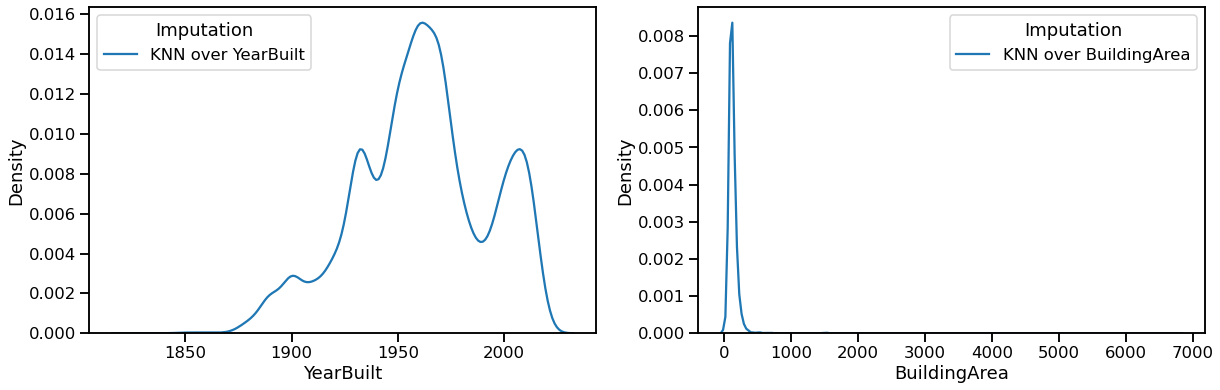

In [222]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.kdeplot(data=df5_yearbuilt_esc, x='YearBuilt', hue='Imputation', ax=ax[0], )

sns.kdeplot(data=df5_buildingarea_esc, x='BuildingArea', hue='Imputation', ax=ax[1])

<AxesSubplot:xlabel='BuildingArea', ylabel='Density'>

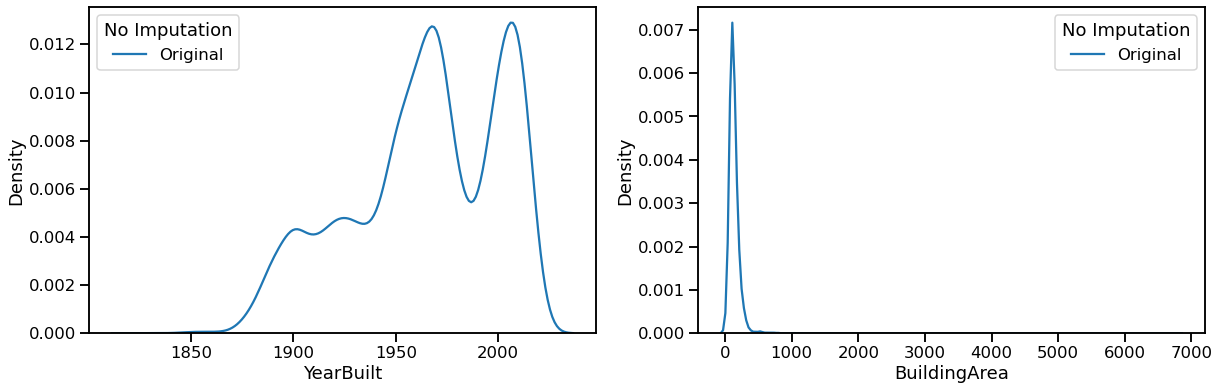

In [223]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.kdeplot(data=df5_yearbuilt_orig, x='YearBuilt', hue='No Imputation', ax=ax[0], )
sns.kdeplot(data=df5_buildingarea_orig, x='BuildingArea', hue='No Imputation', ax=ax[1])

In [224]:
df_5

,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,...,Bedroom2,Car,Postcode,Price,Rooms,airbnb_price_mean_zp,conteo_zipcode,YearBuilt,BuildingArea,Landsize2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,3067.0,1480000.0,2,130.6240,258.0,NaN,NaN,202.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,3067.0,1035000.0,2,130.6240,258.0,1900.0,79.0,156.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3067.0,1465000.0,3,130.6240,258.0,1900.0,150.0,134.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,3067.0,850000.0,3,130.6240,258.0,NaN,NaN,94.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,3067.0,1600000.0,4,130.6240,258.0,2014.0,142.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,3049.0,582000.0,3,92.2857,21.0,NaN,NaN,256.0
11473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,3150.0,1245000.0,4,124.0265,189.0,1981.0,NaN,652.0
11474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,3016.0,1031000.0,3,191.0946,74.0,1995.0,133.0,333.0
11475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,3016.0,1170000.0,3,191.0946,74.0,1997.0,NaN,436.0


In [225]:
df5_yearbuilt_orig =df_5.YearBuilt.to_frame()
df5_yearbuilt_orig['Imputation'] = 'Original'

df5_yearbuilt_esc = df5_mice.YearBuilt.to_frame()
df5_yearbuilt_esc['Imputation'] = 'KNN over YearBuilt'
df5_yearbuilt_esc

data = pd.concat([df5_yearbuilt_esc, df5_yearbuilt_orig])
data

,YearBuilt,Imputation
0,2002.0,KNN over YearBuilt
1,1900.0,KNN over YearBuilt
2,1900.0,KNN over YearBuilt
3,1971.6,KNN over YearBuilt
4,2014.0,KNN over YearBuilt
...,...,...
11472,NaN,Original
11473,1981.0,Original
11474,1995.0,Original
11475,1997.0,Original


In [226]:
df_5.shape

(11477, 529)

In [227]:
df_5[df_5.columns[:420]]

,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,...,suburb:1_Heidelberg West,suburb:1_Highett,suburb:1_Hoppers Crossing,suburb:1_Hughesdale,suburb:1_Huntingdale,suburb:1_Ivanhoe,suburb:1_Ivanhoe East,suburb:1_Jacana,suburb:1_Keilor Park,suburb:1_Kensington
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
df_5.shape

(11477, 529)

In [229]:
df_6 =pd.DataFrame(pd.concat([df_5[df_5.columns.difference(['YearBuilt','BuildingArea','Landsize2'])],df5_mice[['YearBuilt','BuildingArea','Landsize2']]],axis=1))
df_6.columns

Index(['Bathroom', 'Bedroom2', 'Car', 'CouncilArea_Banyule',
       'CouncilArea_Bayside', 'CouncilArea_Boroondara', 'CouncilArea_Brimbank',
       'CouncilArea_Cardinia', 'CouncilArea_Casey', 'CouncilArea_Darebin',
       ...
       'suburb:1_Williams Landing', 'suburb:1_Williamstown',
       'suburb:1_Williamstown North', 'suburb:1_Windsor',
       'suburb:1_Yarra Glen', 'suburb:1_Yarraville', 'suburb:1_nan',
       'YearBuilt', 'BuildingArea', 'Landsize2'],
      dtype='object', length=529)

In [230]:
df_6.describe()

,Bathroom,Bedroom2,Car,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,...,suburb:1_Williams Landing,suburb:1_Williamstown,suburb:1_Williamstown North,suburb:1_Windsor,suburb:1_Yarra Glen,suburb:1_Yarraville,suburb:1_nan,YearBuilt,BuildingArea,Landsize2
count,11477.000000,11477.000000,11477.000000,11477.00000,11477.000000,11477.000000,11477.000000,11477.000000,11477.000000,11477.000000,...,11477.000000,11477.000000,11477.000000,11477.000000,11477.000000,11477.000000,11477.000000,11477.000000,11477.000000,11477.000000
mean,1.471987,2.811449,1.531498,0.03886,0.034765,0.079028,0.028753,0.000349,0.001830,0.080335,...,0.000174,0.008626,0.001655,0.005141,0.000087,0.014028,0.001743,1960.925277,131.892292,619.147547
std,0.628020,0.942212,0.930762,0.19327,0.183192,0.269794,0.167119,0.018666,0.042738,0.271822,...,0.013200,0.092479,0.040656,0.071517,0.009334,0.117612,0.041710,31.233922,105.699221,1447.366304
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1940.000000,95.800000,264.000000
50%,1.000000,3.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1960.000000,119.000000,461.000000
75%,2.000000,3.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1980.000000,151.000000,665.600000
max,8.000000,20.000000,10.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,6791.000000,75100.000000


mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = df_4.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pd.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='YearBuilt', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [231]:
df_6.columns

Index(['Bathroom', 'Bedroom2', 'Car', 'CouncilArea_Banyule',
       'CouncilArea_Bayside', 'CouncilArea_Boroondara', 'CouncilArea_Brimbank',
       'CouncilArea_Cardinia', 'CouncilArea_Casey', 'CouncilArea_Darebin',
       ...
       'suburb:1_Williams Landing', 'suburb:1_Williamstown',
       'suburb:1_Williamstown North', 'suburb:1_Windsor',
       'suburb:1_Yarra Glen', 'suburb:1_Yarraville', 'suburb:1_nan',
       'YearBuilt', 'BuildingArea', 'Landsize2'],
      dtype='object', length=529)

In [232]:
df_6['Price']

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
11472     582000.0
11473    1245000.0
11474    1031000.0
11475    1170000.0
11476    1285000.0
Name: Price, Length: 11477, dtype: float64

In [233]:
from sklearn.preprocessing import StandardScaler
## se seleccionan las variables numéricas para aplicar el PCA
features=df_6[['Bathroom', 'Rooms', 'airbnb_price_mean_zp',
       'conteo_zipcode', 'YearBuilt', 'BuildingArea','Bedroom2',
       'Landsize2','Car']]

In [234]:
features

,Bathroom,Rooms,airbnb_price_mean_zp,conteo_zipcode,YearBuilt,BuildingArea,Bedroom2,Landsize2,Car
0,1.0,2,130.6240,258.0,2002.0,112.2,2.0,202.0,1.0
1,1.0,2,130.6240,258.0,1900.0,79.0,2.0,156.0,0.0
2,2.0,3,130.6240,258.0,1900.0,150.0,3.0,134.0,0.0
3,2.0,3,130.6240,258.0,1971.6,73.8,3.0,94.0,1.0
4,1.0,4,130.6240,258.0,2014.0,142.0,3.0,120.0,2.0
...,...,...,...,...,...,...,...,...,...
11472,2.0,3,92.2857,21.0,1927.6,90.4,3.0,256.0,2.0
11473,2.0,4,124.0265,189.0,1981.0,156.2,4.0,652.0,2.0
11474,2.0,3,191.0946,74.0,1995.0,133.0,3.0,333.0,2.0
11475,2.0,3,191.0946,74.0,1997.0,226.4,3.0,436.0,4.0


In [235]:
# Separating out the features
x = features
# Separating out the target
y = df_6['Price']
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [236]:
x

array([[-0.75158078, -0.89346148,  0.00752807, ..., -0.86125442,
        -0.28822401, -0.57106001],
       [-0.75158078, -0.89346148,  0.00752807, ..., -0.86125442,
        -0.32000726, -1.64549536],
       [ 0.84079371,  0.17837477,  0.00752807, ...,  0.20012397,
        -0.33520794, -1.64549536],
       ...,
       [ 0.84079371,  0.17837477,  1.20483248, ...,  0.20012397,
        -0.19771084,  0.50337535],
       [ 0.84079371,  0.17837477,  1.20483248, ...,  0.20012397,
        -0.126544  ,  2.65224607],
       [-0.75158078,  1.25021103,  0.1062458 , ...,  1.26150237,
        -0.17767358, -0.57106001]])

In [237]:
from sklearn.decomposition import PCA

In [238]:
x.shape[1]

9

In [239]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bathroom              11477 non-null  float64
 1   Rooms                 11477 non-null  int64  
 2   airbnb_price_mean_zp  11477 non-null  float64
 3   conteo_zipcode        11477 non-null  float64
 4   YearBuilt             11477 non-null  float64
 5   BuildingArea          11477 non-null  float64
 6   Bedroom2              11477 non-null  float64
 7   Landsize2             11477 non-null  float64
 8   Car                   11477 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 807.1 KB


In [240]:
pca = PCA(min(20, x.shape[1]))
principalComponents=pca.fit(x)
print("Principal components")
print(pca.components_)

Principal components
[[ 4.15554105e-01  5.38825856e-01 -1.11088651e-01 -2.23303742e-01
   4.82925606e-02  2.56407010e-01  5.35504063e-01 -2.84618017e-02
   3.45144654e-01]
 [ 2.07367948e-01 -8.28700621e-02  1.19228673e-01  1.91162152e-01
   6.81225075e-01 -6.84681597e-02 -7.90778797e-02  6.28365975e-01
   1.71813969e-01]
 [ 2.52387697e-01  1.05967660e-01  7.32628624e-01  5.14992291e-01
  -2.68022369e-01  1.46263649e-01  1.05887998e-01 -7.87012852e-03
  -1.36404885e-01]
 [-8.76366480e-02  9.35466970e-02 -5.22535078e-01  4.23788478e-01
  -3.48125350e-01  3.23850071e-01  8.93243817e-02  4.96677441e-01
  -2.24035259e-01]
 [-1.31577036e-01 -2.02218178e-01  1.52385247e-01 -2.34451786e-01
   1.64525983e-01  8.89425634e-01 -2.07255372e-01 -4.97816839e-02
   5.15998023e-03]
 [-2.54534100e-01  1.67839567e-02  3.33015732e-01 -4.86627921e-01
  -4.38995606e-01 -1.02556554e-01  1.92761773e-02  5.75955519e-01
   2.27800702e-01]
 [-1.91814140e-01 -1.30350533e-01 -7.55844942e-02  3.91174833e-01
  -1.47

In [241]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = pca.components_,
    columns = features.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9']
)

,Bathroom,Rooms,airbnb_price_mean_zp,conteo_zipcode,YearBuilt,BuildingArea,Bedroom2,Landsize2,Car
PC1,0.415554,0.538826,-0.111089,-0.223304,0.048293,0.256407,0.535504,-0.028462,0.345145
PC2,0.207368,-0.082870,0.119229,0.191162,0.681225,-0.068468,-0.079078,0.628366,0.171814
PC3,0.252388,0.105968,0.732629,0.514992,-0.268022,0.146264,0.105888,-0.007870,-0.136405
PC4,-0.087637,0.093547,-0.522535,0.423788,-0.348125,0.323850,0.089324,0.496677,-0.224035
PC5,-0.131577,-0.202218,0.152385,-0.234452,0.164526,0.889426,-0.207255,-0.049782,0.005160
PC6,-0.254534,0.016784,0.333016,-0.486628,-0.438996,-0.102557,0.019276,0.575956,0.227801
PC7,-0.191814,-0.130351,-0.075584,0.391175,-0.147428,0.040799,-0.135253,-0.144118,0.851482
PC8,-0.770566,0.338605,0.154237,0.154866,0.314602,0.002884,0.369590,-0.051207,-0.074832
PC9,0.016375,-0.714143,-0.005786,-0.001758,-0.008814,0.005189,0.699696,-0.000840,0.003882


In [242]:
pca_dummy_features = pca.fit_transform(x)
pca_dummy_features

array([[-1.49118039,  0.66989904, -0.52607841, ..., -0.16062301,
         0.47332272,  0.00806877],
       [-2.09936697, -1.7379289 ,  0.45010019, ..., -0.60224559,
        -0.47298652,  0.03107991],
       [-0.11907051, -1.63602101,  1.17633487, ..., -1.16135679,
        -0.94209697,  0.03785104],
       ...,
       [ 0.73286647,  0.9242662 ,  0.59413286, ..., -0.14487584,
        -0.06697245,  0.01261959],
       [ 1.70218584,  1.32130998,  0.41254326, ...,  1.70120618,
        -0.20872682,  0.02492403],
       [ 0.79462388, -1.49867265,  0.38849314, ..., -0.60071951,
         1.07342519, -0.01400253]])

In [243]:
principalDf = pd.DataFrame(data = pca_dummy_features)
principalDf.columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PC9']
principalDf

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PC9
0,-1.491180,0.669899,-0.526078,-0.513842,0.455927,-0.827741,-0.160623,0.473323,0.008069
1,-2.099367,-1.737929,0.450100,0.746274,-0.364728,0.375092,-0.602246,-0.472987,0.031080
2,-0.119071,-1.636021,1.176335,1.011793,-0.412743,-0.069419,-1.161357,-0.942097,0.037851
3,0.178406,0.142272,0.310110,-0.274194,-0.669878,-0.773031,-0.609902,-0.301945,0.018098
4,0.695554,0.799755,-0.394383,-0.529800,0.124807,-0.756761,0.294281,1.635643,-0.777883
...,...,...,...,...,...,...,...,...,...
11472,0.784922,-0.819814,-0.413338,0.132658,-0.686267,0.283029,0.240955,-1.074344,0.041235
11473,1.966192,0.487021,0.201739,-0.013110,-0.341511,-0.407683,-0.129538,0.393091,0.001710
11474,0.732866,0.924266,0.594133,-1.406560,0.279935,-0.112351,-0.144876,-0.066972,0.012620
11475,1.702186,1.321310,0.412543,-1.588749,1.083982,0.299413,1.701206,-0.208727,0.024924


In [244]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PC9,Price
0,-1.491180,0.669899,-0.526078,-0.513842,0.455927,-0.827741,-0.160623,0.473323,0.008069,1480000.0
1,-2.099367,-1.737929,0.450100,0.746274,-0.364728,0.375092,-0.602246,-0.472987,0.031080,1035000.0
2,-0.119071,-1.636021,1.176335,1.011793,-0.412743,-0.069419,-1.161357,-0.942097,0.037851,1465000.0
3,0.178406,0.142272,0.310110,-0.274194,-0.669878,-0.773031,-0.609902,-0.301945,0.018098,850000.0
4,0.695554,0.799755,-0.394383,-0.529800,0.124807,-0.756761,0.294281,1.635643,-0.777883,1600000.0
...,...,...,...,...,...,...,...,...,...,...
11472,0.784922,-0.819814,-0.413338,0.132658,-0.686267,0.283029,0.240955,-1.074344,0.041235,582000.0
11473,1.966192,0.487021,0.201739,-0.013110,-0.341511,-0.407683,-0.129538,0.393091,0.001710,1245000.0
11474,0.732866,0.924266,0.594133,-1.406560,0.279935,-0.112351,-0.144876,-0.066972,0.012620,1031000.0
11475,1.702186,1.321310,0.412543,-1.588749,1.083982,0.299413,1.701206,-0.208727,0.024924,1170000.0


In [245]:
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Explained variance ratio
[0.32230015 0.1338537  0.11862371 0.09945999 0.09505685 0.09486834
 0.07772334 0.05174584 0.00636809]


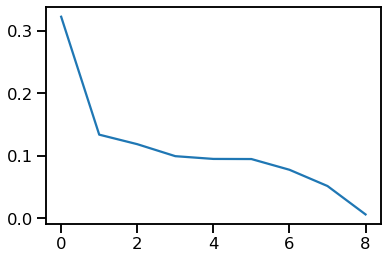

In [246]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)

In [247]:
principalDf[principalDf.columns[0]]

0       -1.491180
1       -2.099367
2       -0.119071
3        0.178406
4        0.695554
           ...   
11472    0.784922
11473    1.966192
11474    0.732866
11475    1.702186
11476    0.794624
Name: PCA1, Length: 11477, dtype: float64

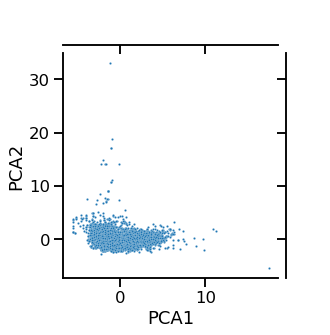

In [248]:
import seaborn
g = seaborn.JointGrid(x=principalDf[principalDf.columns[0]], y=principalDf[principalDf.columns[1]], height=5)
g.plot_joint(sns.scatterplot, s=5)


In [249]:
total_var = pca.explained_variance_ratio_.sum() * 100
total_var

99.99999999999999

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [250]:
## Small example
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
#categorical_cols = ['Type', 'Regionname']
#numerical_cols = ['Rooms', 'Distance']
#new_columns = []

In [251]:
# Step 1: encode categorical columns
#encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#X_cat = encoder.fit_transform(df_6[categorical_cols])
###############
###############
#for col, col_values in zip(categorical_cols, encoder.categories_):
 # for col_value in col_values:
  #  new_columns.append('{}={}'.format(col, col_value))
#print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

In [252]:
# Step 2: Append the numerical columns
#X = numpy.hstack([X_cat, df_6[numerical_cols].values])
#new_columns.extend(numerical_cols)
#print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

In [253]:
# Step 3: Append some new features, like PCA
#pca = PCA(n_components=2)
#pca_dummy_features = pca.fit_transform(X)
#X_pca = numpy.hstack([X, pca_dummy_features])
#new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
#processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
#processed_melb_df.head()

In [254]:
final1=pd.concat([df_3,df_6[['Landsize2','YearBuilt','BuildingArea']]],axis=1)
print(final1)
len(final1)
#######

       Bathroom  Bedroom2  Car CouncilArea  Postcode      Price  Rooms  \
0           1.0       2.0  1.0       Yarra    3067.0  1480000.0      2   
1           1.0       2.0  0.0       Yarra    3067.0  1035000.0      2   
2           2.0       3.0  0.0       Yarra    3067.0  1465000.0      3   
3           2.0       3.0  1.0       Yarra    3067.0   850000.0      3   
4           1.0       3.0  2.0       Yarra    3067.0  1600000.0      4   
...         ...       ...  ...         ...       ...        ...    ...   
11472       2.0       3.0  2.0         NaN    3049.0   582000.0      3   
11473       2.0       4.0  2.0         NaN    3150.0  1245000.0      4   
11474       2.0       3.0  2.0         NaN    3016.0  1031000.0      3   
11475       2.0       3.0  4.0         NaN    3016.0  1170000.0      3   
11476       1.0       4.0  1.0         NaN    3013.0  1285000.0      4   

              Suburb Type  airbnb_price_mean_zp         city  conteo_zipcode  \
0         Abbotsford    h      

11477

In [255]:
final2=pd.concat([final1,principalDf[principalDf.columns[:1]]],axis=1)
final2

,Bathroom,Bedroom2,Car,CouncilArea,Postcode,Price,Rooms,Suburb,Type,airbnb_price_mean_zp,city,conteo_zipcode,suburb:1,Landsize2,YearBuilt,BuildingArea,PCA1
0,1.0,2.0,1.0,Yarra,3067.0,1480000.0,2,Abbotsford,h,130.6240,Yarra,258.0,Abbotsford,202.0,2002.0,112.2,-1.491180
1,1.0,2.0,0.0,Yarra,3067.0,1035000.0,2,Abbotsford,h,130.6240,Yarra,258.0,Abbotsford,156.0,1900.0,79.0,-2.099367
2,2.0,3.0,0.0,Yarra,3067.0,1465000.0,3,Abbotsford,h,130.6240,Yarra,258.0,Abbotsford,134.0,1900.0,150.0,-0.119071
3,2.0,3.0,1.0,Yarra,3067.0,850000.0,3,Abbotsford,h,130.6240,Yarra,258.0,Abbotsford,94.0,1971.6,73.8,0.178406
4,1.0,3.0,2.0,Yarra,3067.0,1600000.0,4,Abbotsford,h,130.6240,Yarra,258.0,Abbotsford,120.0,2014.0,142.0,0.695554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11472,2.0,3.0,2.0,NaN,3049.0,582000.0,3,Westmeadows,h,92.2857,Hume,21.0,Westmeadows,256.0,1927.6,90.4,0.784922
11473,2.0,4.0,2.0,NaN,3150.0,1245000.0,4,Wheelers Hill,h,124.0265,Monash,189.0,Wheelers Hill,652.0,1981.0,156.2,1.966192
11474,2.0,3.0,2.0,NaN,3016.0,1031000.0,3,Williamstown,h,191.0946,Hobsons Bay,74.0,Williamstown,333.0,1995.0,133.0,0.732866
11475,2.0,3.0,4.0,NaN,3016.0,1170000.0,3,Williamstown,h,191.0946,Hobsons Bay,74.0,Williamstown,436.0,1997.0,226.4,1.702186


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
